In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np

from q2_f import f, gradient, hessian
from steepest_descent import steepest_descent
from newton import newton
from convergence_plots import trajectories_convergence, error_convergence, gradient_norm_convergence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Steepest descent line search with Wolfe conditions
After 10 iterations, x_min = [0.567764, 0.566375], f(x_min) = 2.0369604411727406e-06


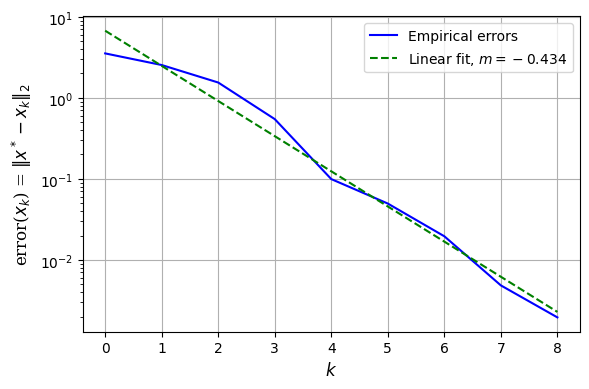

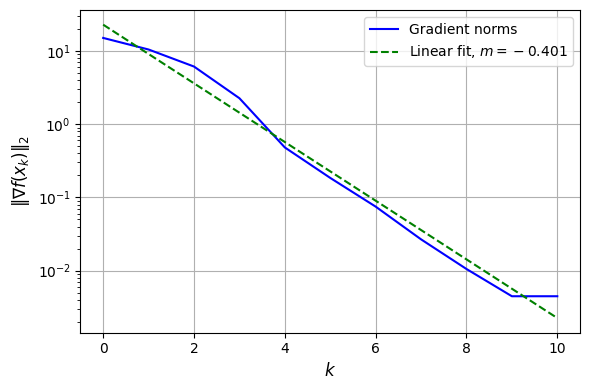

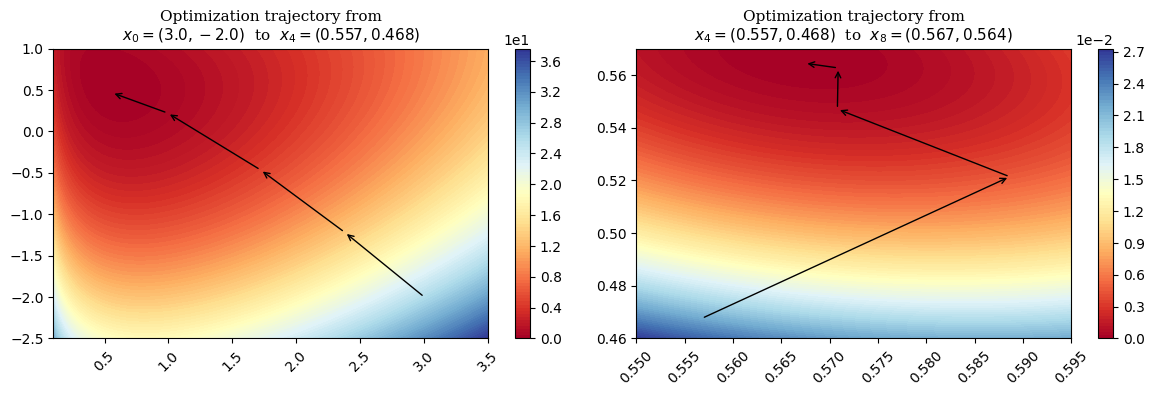

In [2]:
# Steepest Descent Line Search

xs, errors = steepest_descent(
    x_0=np.array([[3.],[-2.]]),
    max_iter=20
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=4, end_idx=8, 
    xlims=((0.1,3.5),(0.55,0.595)), 
    ylims=((-2.5,1.0),(0.46,0.57))
)

Steepest descent line search with Wolfe conditions
After 20 iterations, x_min = [0.567293, 0.567505], f(x_min) = 4.3777317639146566e-07


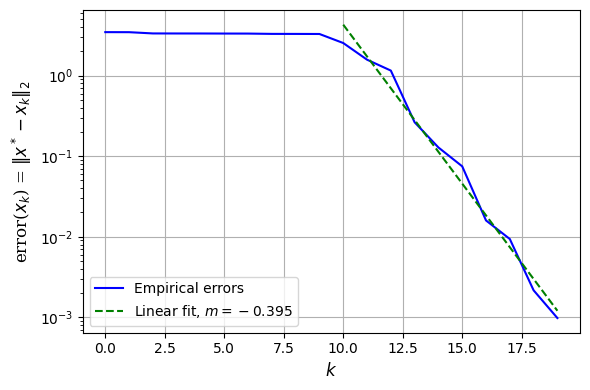

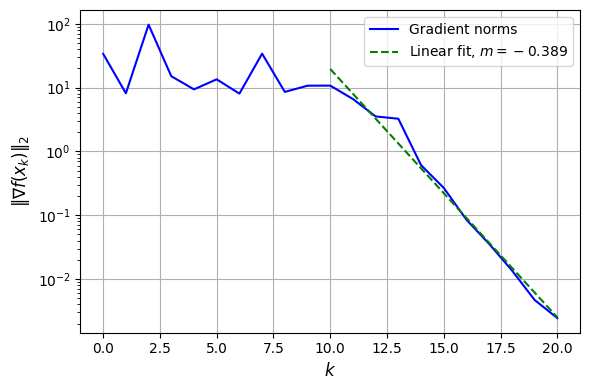

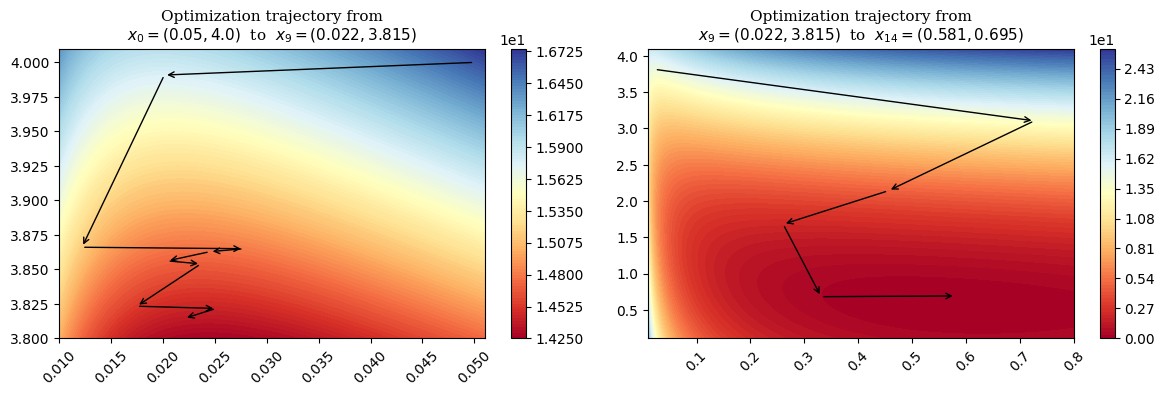

In [3]:
# Steepest Descent Line Search

xs, errors = steepest_descent(
    x_0=np.array([[0.05],[4.]]),
    max_iter=20
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True, ignore=10)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True, ignore=10)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=9, end_idx=14, 
    xlims=((0.01, 0.051),(0.01, 0.8)),
    ylims=((3.8, 4.01),(0.11, 4.1))
)

Newton line search with Wolfe conditions
After 7 iterations, x_min = [0.567137, 0.567161], f(x_min) = 5.975223583320956e-10


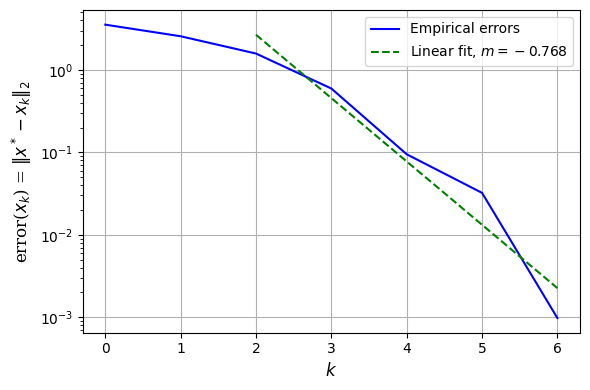

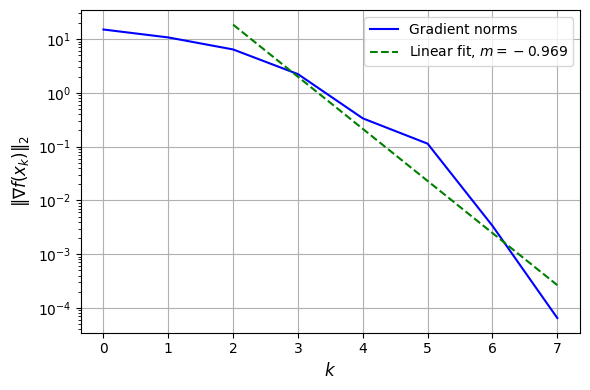

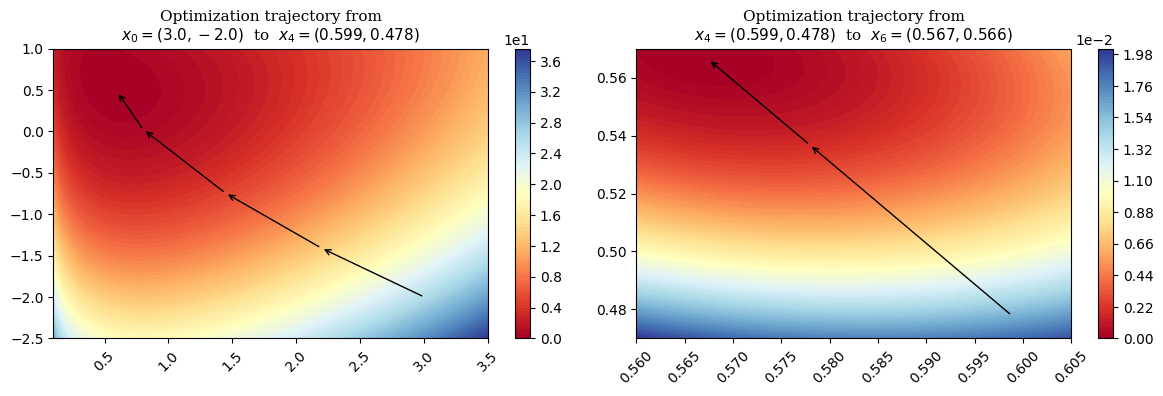

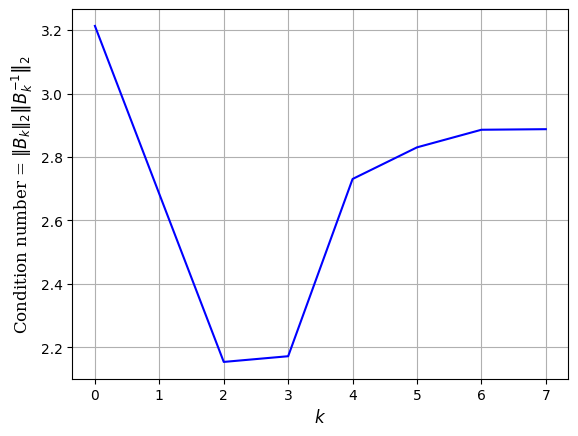

In [24]:
# Newton Line Search

xs, errors = newton(
    x_0=np.array([[3.],[-2.]]),
    max_iter=7
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True, ignore=2)
### FIT FOR QUADRATIC CONVERGENCE
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True, ignore=2)
trajectories_convergence(
    xs, f,
    start_idx=0, middle_idx=4, end_idx=6, 
    xlims=((0.1,3.5),(0.56,0.605)), 
    ylims=((-2.5,1.0),(0.47,0.57))
)

import matplotlib.pyplot as plt
from convergence_plots import fontdict

condition_nums = [np.linalg.norm(hessian(x))*np.linalg.norm(np.linalg.pinv(hessian(x))) for x in xs]
plt.plot(condition_nums, color='blue')
plt.xlabel(r'$k$', fontdict=fontdict)
plt.ylabel(r'Condition number = $\|B_k\|_2\left\|B_k^{-1}\right\|_2$', fontdict=fontdict)
plt.grid()
plt.show()

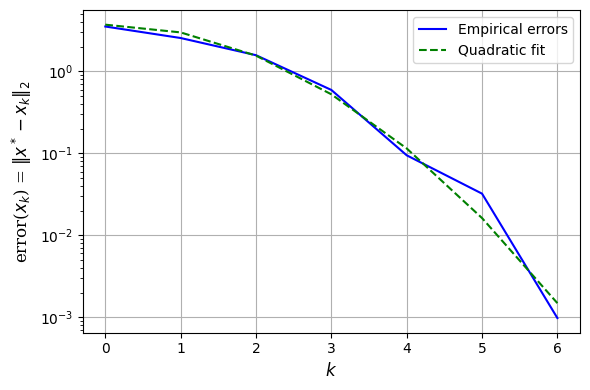

In [25]:
from sklearn.linear_model import LinearRegression

def quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True, ignore=0):

    y_fit = errors[errors != 0.] if ylog else errors
    x_fit = np.arange(y_fit.size)

    plt.figure(figsize=(6, 4))
    plt.plot(x_fit, y_fit, color='blue', label='Empirical errors')
    plt.xlabel(r'$k$', fontdict=fontdict)
    plt.ylabel(r'error($x_k$) = $\|x^*-x_k\|_2$', fontdict=fontdict)
    
    if ylog:
        plt.yscale('log')
    
    if overlay_fit:
        x_fit = x_fit[ignore:]; y_fit = y_fit[ignore:]
        x_fit = x_fit.reshape(-1, 1)
        lr = LinearRegression().fit(
            x_fit if not xsq else np.square(x_fit),
            y_fit if not ylog else np.log10(y_fit)
        )
        preds = lr.predict(x_fit if not xsq else np.square(x_fit))
        plt.plot(x_fit.flatten(), preds if not ylog else np.power(10, preds), '--', color='green', label=fr'Quadratic fit')
        plt.legend()
    
    plt.grid()
    plt.tight_layout()
    plt.show()

quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True, ignore=0)

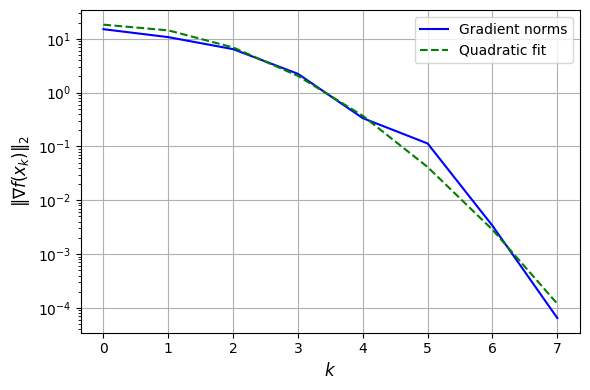

In [26]:
def quadratic_grad_convergence(xs, gradient, xsq=False, ylog=False, overlay_fit=False, ignore=0):

    y_fit = np.array([np.linalg.norm(gradient(x)) for x in xs])
    x_fit = np.arange(y_fit.size)

    plt.figure(figsize=(6, 4))
    plt.plot(x_fit, y_fit, color='blue', label='Gradient norms')
    plt.xlabel(r'$k$', fontdict=fontdict)
    plt.ylabel(r'$\|\nabla f(x_k)\|_2$', fontdict=fontdict)
    if ylog:
        plt.yscale('log')

    if overlay_fit:
        x_fit = x_fit[ignore:]; y_fit = y_fit[ignore:]
        x_fit = x_fit.reshape(-1, 1)
        lr = LinearRegression().fit(
            x_fit if not xsq else np.square(x_fit),
            y_fit if not ylog else np.log10(y_fit)
        )
        preds = lr.predict(x_fit if not xsq else np.square(x_fit))
        plt.plot(x_fit.flatten(), preds if not ylog else np.power(10, preds), '--', color='green', label='Quadratic fit')
        plt.legend()

    plt.grid()
    plt.tight_layout()
    plt.show()

quadratic_grad_convergence(xs, gradient, xsq=True, ylog=True, overlay_fit=True)

Newton line search with Wolfe conditions
After 7 iterations, x_min = [0.566591, 0.566966], f(x_min) = 1.4687814847867125e-06


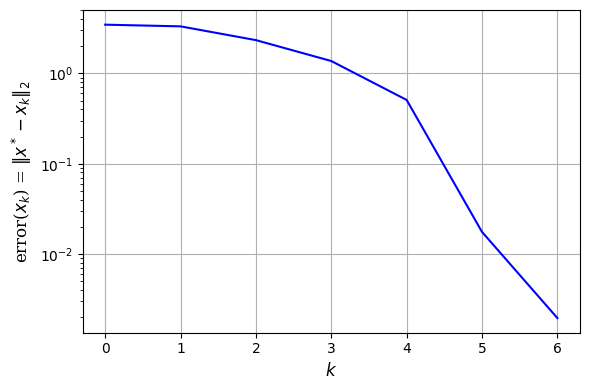

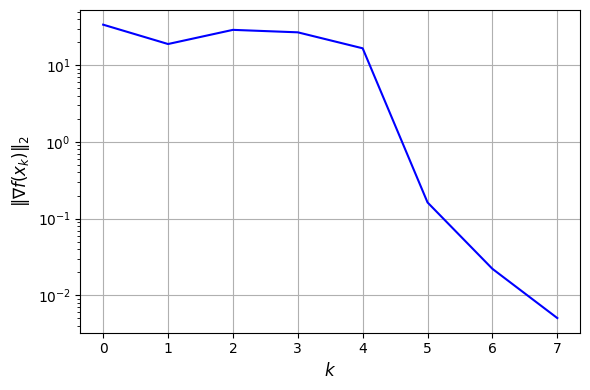

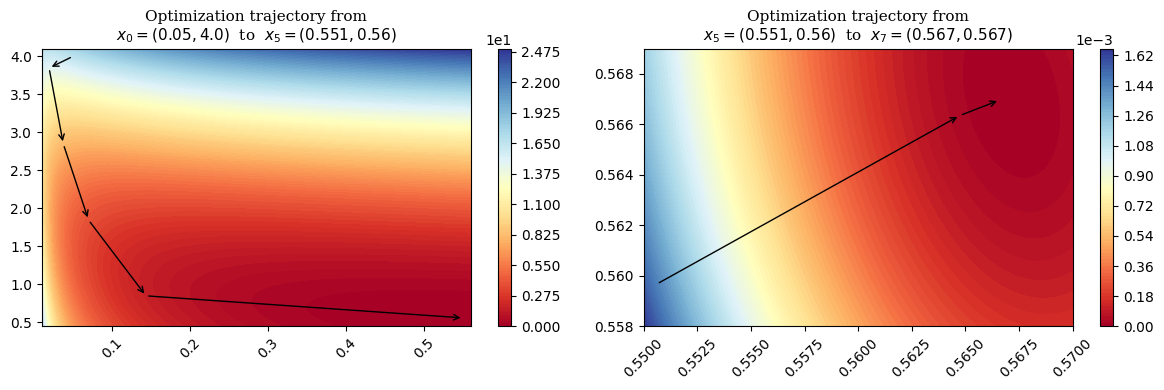

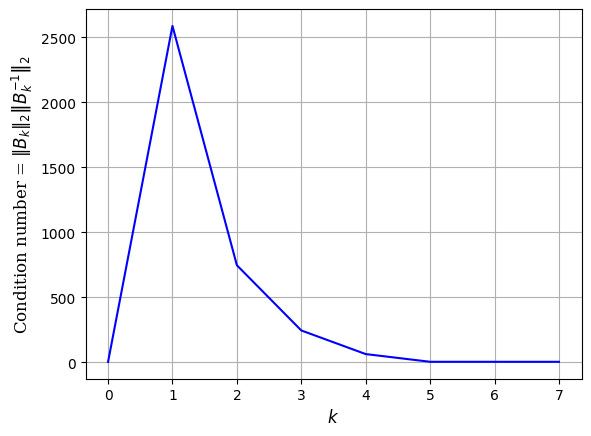

In [27]:
# Newton Line Search

xs, errors = newton(
    x_0=np.array([[0.05],[4.]]),
    max_iter=7
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=False)
gradient_norm_convergence(xs, gradient, ylog=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=5, end_idx=7, 
    xlims=((0.01,0.56),(0.55,0.57)),
    ylims=((0.45,4.1),(0.558,0.569))
)

condition_nums = [np.linalg.norm(hessian(x))*np.linalg.norm(np.linalg.pinv(hessian(x))) for x in xs]
plt.plot(condition_nums, color='blue')
plt.xlabel(r'$k$', fontdict=fontdict)
plt.ylabel(r'Condition number = $\|B_k\|_2\left\|B_k^{-1}\right\|_2$', fontdict=fontdict)
plt.grid()
plt.show()

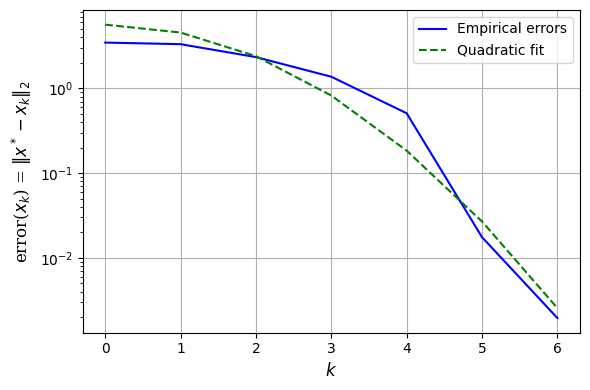

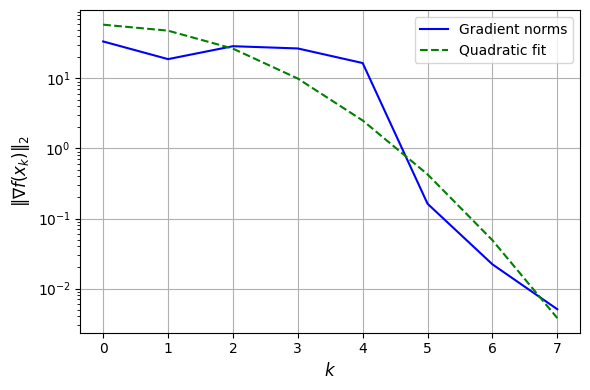

In [28]:
quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True, ignore=0)
quadratic_grad_convergence(xs, gradient, xsq=True, ylog=True, overlay_fit=True)